In [161]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from utils import *
from utils_emb import *
import os
from goatools.obo_parser import GODag
from goatools.associations import dnld_assc
import pickle

In [4]:
godag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 GO Terms


In [6]:
associations = dnld_assc("datasets/goa_human.gaf", godag, namespace="all")
termcounts = TermCounts(godag, associations)

HMS:0:00:11.266026 479,438 annotations READ: datasets/goa_human.gaf 
19783 IDs in loaded association branch, all


In [7]:
pln_go_df = pd.read_csv("datasets/pln_goa_comp/goa_pln_diff_2.csv")
goa_df = pd.read_csv("datasets/pln_goa_comp/goa_pln_diff_1.csv")

In [8]:
pln_lst = pln_go_df[pln_go_df["NS"] == "BP"]["# GO"].to_list()
goa_lst = goa_df[goa_df["NS"] == "BP"]["# GO"].to_list()

In [9]:
len(pln_lst)

405

In [130]:
import pickle
with open("datasets/pubmed_abstracts.pickle", "rb") as fp:
    abstract_dict = pickle.load(fp)
with open("datasets/pubmed_gos.pickle" ,"rb") as fp:
    go_dict = pickle.load(fp)

#### Build a similarity matrix between the GOs in the two lists

In [158]:
pln_goa_ss = semantic_sim_matrix(pln_lst, goa_lst, godag, termcounts)
pln_goa_ss_df = pd.DataFrame(pln_goa_ss, index=pln_lst, columns=goa_lst)
display(pln_goa_ss_df)

,GO:0006658,GO:0070986,GO:0002064,GO:0030512,GO:0051965,GO:0034249,GO:0017148,GO:1901890,GO:0070102,GO:0017015,...,GO:0046794,GO:0002573,GO:1901988,GO:0010564,GO:1901991,GO:0001558,GO:0010948,GO:0002683,GO:0001818,GO:0006302
GO:1902600,0.026728,0.0,0.030317,0.000000,0.000000,0.000000,0.000000,0.000000,0.025231,0.000000,...,0.269237,0.029713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031622
GO:0098662,0.030481,0.0,0.035239,0.000000,0.000000,0.000000,0.000000,0.000000,0.028549,0.000000,...,0.309554,0.034425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037014
GO:0070126,0.025607,0.0,0.028883,0.000000,0.000000,0.000000,0.000000,0.000000,0.024229,0.000000,...,0.000000,0.028334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030064
GO:0019646,0.132471,0.0,0.025231,0.000000,0.000000,0.000000,0.000000,0.000000,0.021606,0.000000,...,0.000000,0.024811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152512
GO:0006123,0.132471,0.0,0.025231,0.000000,0.000000,0.000000,0.000000,0.000000,0.021606,0.000000,...,0.000000,0.024811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0000018,0.000000,0.0,0.000000,0.087779,0.087077,0.218716,0.216028,0.090454,0.076822,0.091377,...,0.000000,0.000000,0.098299,0.112308,0.097552,0.104625,0.102039,0.093546,0.226567,0.000000
GO:0008406,0.000000,0.0,0.332082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.244456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GO:0031124,0.153469,0.0,0.028553,0.000000,0.000000,0.000000,0.000000,0.000000,0.023997,0.000000,...,0.000000,0.028016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412317
GO:1901362,0.182839,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.474428


GO:0006650 (PLN list) and GO:0006658 (GOA list) an ss score of 0.78 and it can be seen from the graph below they have parent-child r/nships. Hence, such pairs should be filtered out

/home/xabush/venv/bin/go_plot.py  GO:0006650#3bd163 GO:0006658#7276e0 -o datasets/aaa_lin.png --gaf=datasets/goa_human.gaf
b'go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 GO Terms\n GoSubDag:   2 sources in  18 GOs rcnt(False). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name id\n GoSubDag: relationships: set()\nHMS:0:00:10.444724 479,438 annotations READ: datasets/goa_human.gaf \n GoSubDag:   2 sources in  18 GOs rcnt(True). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 tcnt tfreq tinfo id\n GoSubDag: relationships: set()\n        GO:0008150  # BP 28747  17,652 1.000000  0.00 L00 D00       biological_process\n#f1fbfd GO:0009987  # BP 12153  15,209 0.861602  0.15 L01 D01 A     cellular process\n#f1fbfd GO:0008152  # BP  6382   8,234 0.466463  0.76 L01 D01 B     metabolic process\n        GO:0044237  # BP  5514   7,399 0.419159  0.87 L02 D02 AB    cellular metabolic process\n        GO:0071704  # BP  6032   7,773 0.440347  0.8

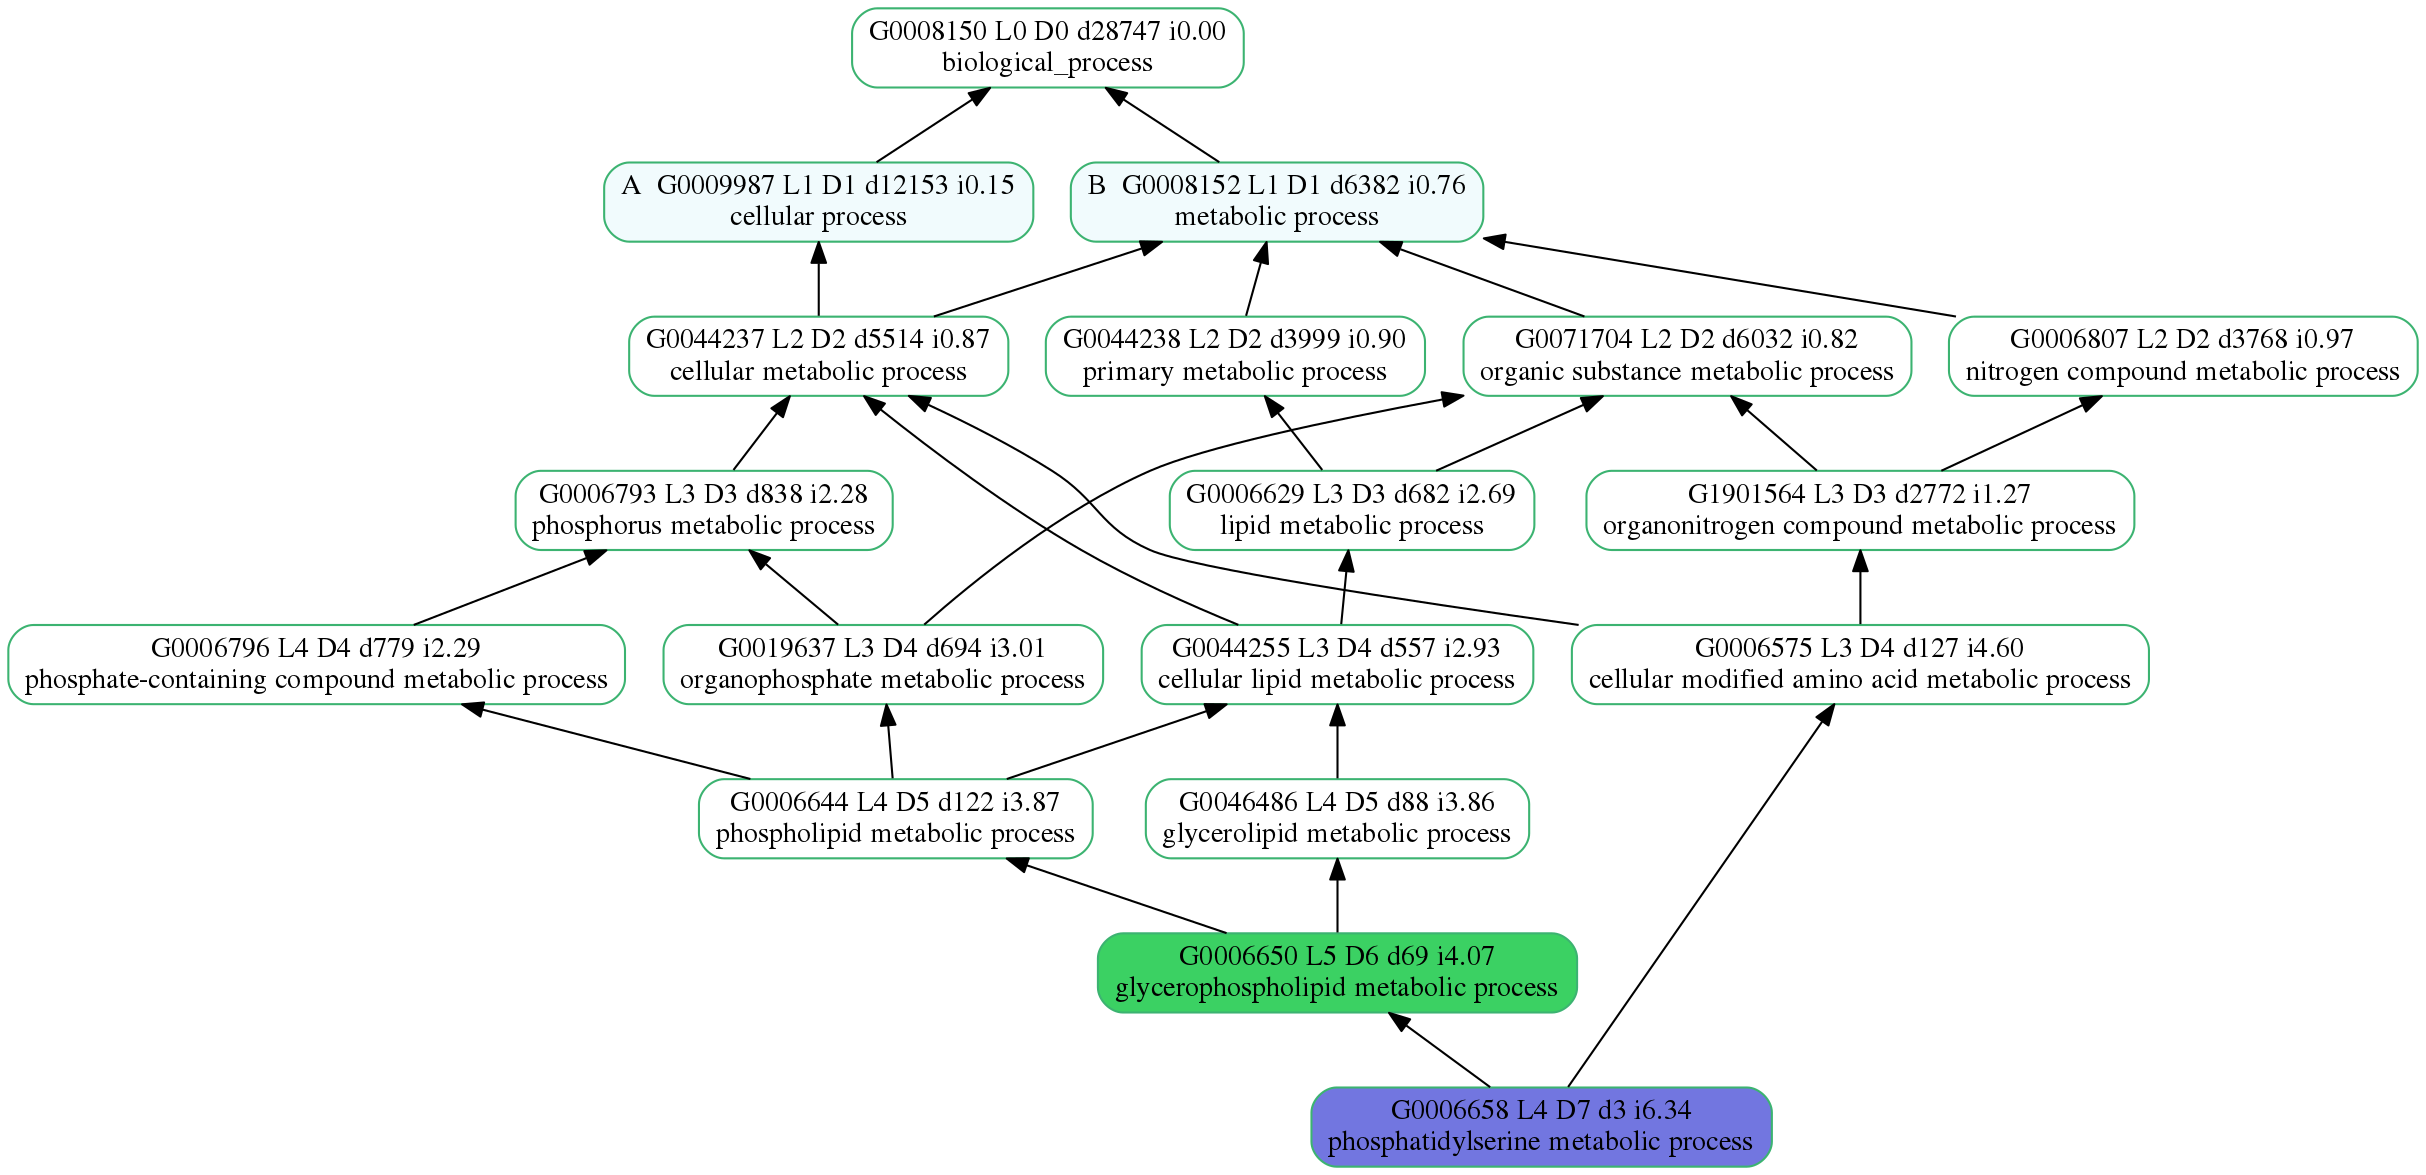

In [15]:
draw_gos(["GO:0006650"], ["GO:0006658"])

In [162]:
print(semantic_sim_matrix(["GO:0006650"], ["GO:0006658"], godag, termcounts))

TypeError: semantic_sim_matrix() takes 2 positional arguments but 4 were given

In [17]:
res = filter_similar_gos(pln_lst, goa_lst, score=0.7)
len(res)

323

In [18]:
pln_goa_ss = semantic_sim_matrix(res, goa_lst)
pln_goa_ss_df = pd.DataFrame(pln_goa_ss, index=pln_lst, columns=goa_lst)
display(pln_goa_ss_df)

,GO:0006658,GO:0070986,GO:0002064,GO:0030512,GO:0051965,GO:0034249,GO:0017148,GO:1901890,GO:0070102,GO:0017015,...,GO:0046794,GO:0002573,GO:1901988,GO:0010564,GO:1901991,GO:0001558,GO:0010948,GO:0002683,GO:0001818,GO:0006302
GO:1902600,0.026728,0.0,0.030317,0.000000,0.000000,0.000000,0.000000,0.000000,0.025231,0.000000,...,0.269237,0.029713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031622
GO:0098662,0.030481,0.0,0.035239,0.000000,0.000000,0.000000,0.000000,0.000000,0.028549,0.000000,...,0.309554,0.034425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037014
GO:0070126,0.025607,0.0,0.028883,0.000000,0.000000,0.000000,0.000000,0.000000,0.024229,0.000000,...,0.000000,0.028334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030064
GO:0019646,0.132471,0.0,0.025231,0.000000,0.000000,0.000000,0.000000,0.000000,0.021606,0.000000,...,0.000000,0.024811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152512
GO:0006123,0.132471,0.0,0.025231,0.000000,0.000000,0.000000,0.000000,0.000000,0.021606,0.000000,...,0.000000,0.024811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0000018,0.000000,0.0,0.000000,0.087779,0.087077,0.218716,0.216028,0.090454,0.076822,0.091377,...,0.000000,0.000000,0.098299,0.112308,0.097552,0.104625,0.102039,0.093546,0.226567,0.000000
GO:0008406,0.000000,0.0,0.332082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.244456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GO:0031124,0.153469,0.0,0.028553,0.000000,0.000000,0.000000,0.000000,0.000000,0.023997,0.000000,...,0.000000,0.028016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412317
GO:1901362,0.182839,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.474428


In [19]:
res_2 = filter_similar_gos(goa_lst, pln_lst, score=0.7)
print(len(res_2))
goa_pln_ss = semantic_sim_matrix(res_2, pln_lst)
goa_pln_ss_df = pd.DataFrame(goa_pln_ss, index=goa_lst, columns=pln_lst)
display(goa_pln_ss_df)


193


,GO:1902600,GO:0098662,GO:0070126,GO:0019646,GO:0006123,GO:0070125,GO:0098655,GO:0098660,GO:0006415,GO:1902287,...,GO:0070498,GO:0065004,GO:0060071,GO:2000027,GO:2001021,GO:0000018,GO:0008406,GO:0031124,GO:1901362,GO:0006950
GO:0006658,0.026728,0.030481,0.025607,0.132471,0.132471,0.140855,0.030719,0.030909,0.025798,0.021845,...,0.025751,0.027458,0.025774,0.000000,0.000000,0.000000,0.000000,0.153469,0.182839,0.00000
GO:0070986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
GO:0002064,0.030317,0.035239,0.028883,0.025231,0.025231,0.028851,0.035557,0.035812,0.029126,0.024185,...,0.029066,0.031260,0.029096,0.000000,0.000000,0.000000,0.332082,0.028553,0.000000,0.00000
GO:0030512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073082,...,0.087196,0.000000,0.087282,0.083799,0.244126,0.087779,0.000000,0.000000,0.000000,0.00000
GO:0051965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072595,...,0.086504,0.000000,0.086588,0.397877,0.085149,0.087077,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0001558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084395,...,0.103798,0.000000,0.103919,0.100974,0.101853,0.104625,0.000000,0.000000,0.000000,0.00000
GO:0010948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082705,...,0.101253,0.000000,0.101368,0.098313,0.282759,0.102039,0.000000,0.000000,0.000000,0.00000
GO:0002683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075614,...,0.092815,0.000000,0.092922,0.099830,0.266400,0.093546,0.000000,0.000000,0.000000,0.00000
GO:0001818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073502,...,0.089653,0.000000,0.089752,0.096180,0.257486,0.226567,0.000000,0.000000,0.000000,0.00000


#### Load the pubmed articles with their abstracts and GO terms identified by GOCat

In [131]:
pubmed_gos = []

for k in go_dict:
    pubmed_gos += go_dict[k]

pubmed_gos_bp = []
for i in pubmed_gos:
    try:
        go_term = godag[i]
        if go_term.namespace == "biological_process":
            pubmed_gos_bp.append(i)
    except KeyError:
        continue

pubmed_gos_bp = set(pubmed_gos_bp)
len(pubmed_gos_bp)

909

In [132]:
pln_goa_ss_pubmed = semantic_sim_matrix(pln_lst, pubmed_gos_bp, godag, termcounts)
pln_goa_ss_pubmed_df = pd.DataFrame(pln_goa_ss_pubmed, index=pln_lst, columns=pubmed_gos_bp)
display(pln_goa_ss_pubmed_df)

,GO:0043936,GO:0035702,GO:0032967,GO:0044320,GO:2000210,GO:0033594,GO:0051384,GO:1903215,GO:0009955,GO:1904709,...,GO:0045893,GO:0009627,GO:0071310,GO:0000723,GO:0042127,GO:0060548,GO:0060744,GO:0031640,GO:2000107,GO:1905932
GO:1902600,NaN,0.000000,0.000000,0.024265,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.040526,0.029775,0.000000,0.000000,0.00000,0.027819,0.000000,0.000000
GO:0098662,NaN,0.000000,0.000000,0.027319,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.049829,0.034508,0.000000,0.000000,0.00000,0.031908,0.000000,0.000000
GO:0070126,NaN,0.000000,0.000000,0.023337,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.038003,0.232971,0.000000,0.000000,0.00000,0.026607,0.000000,0.000000
GO:0019646,NaN,0.000000,0.000000,0.020894,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.031924,0.145077,0.000000,0.000000,0.00000,0.023477,0.000000,0.000000
GO:0006123,NaN,0.000000,0.000000,0.020894,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.031924,0.145077,0.000000,0.000000,0.00000,0.023477,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0000018,0.0,0.051439,0.167459,0.000000,0.071931,0.000000,0.000000,0.070115,0.0,NaN,...,0.391883,0.0,0.000000,0.070716,0.123353,0.116117,0.00000,0.000000,0.084128,0.062558
GO:0008406,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.44752,0.000000,0.000000,0.000000
GO:0031124,NaN,0.000000,0.000000,0.023121,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.037434,0.389615,0.000000,0.000000,0.00000,0.026326,0.000000,0.000000
GO:1901362,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.439027,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [133]:

pln_pubmed = {}

for i, go_1 in enumerate(pln_goa_ss_pubmed_df.index.to_list()):
    pln_pubmed[go_1] = []
    for j, go_2 in enumerate(pln_goa_ss_pubmed_df.columns.to_list()):
        if not np.isnan(pln_goa_ss_pubmed_df.iat[i, j]) and pln_goa_ss_pubmed_df.iat[i, j] >= 0.8:
            pln_pubmed[go_1].append(go_2)

In [134]:
list(pln_pubmed.items())[:2]

[('GO:1902600', []), ('GO:0098662', ['GO:0055085'])]

[[0.86620918]]
/home/xabush/venv/bin/go_plot.py  GO:0098662#3bd163 GO:0055085#7276e0 -o datasets/aaa_lin.png --gaf=datasets/goa_human.gaf
b'go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 GO Terms\n GoSubDag:   2 sources in  12 GOs rcnt(False). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name id\n GoSubDag: relationships: set()\nHMS:0:00:10.490657 479,438 annotations READ: datasets/goa_human.gaf \n GoSubDag:   2 sources in  12 GOs rcnt(True). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 tcnt tfreq tinfo id\n GoSubDag: relationships: set()\n        GO:0008150  # BP 28747  17,652 1.000000  0.00 L00 D00       biological_process\n#f1fbfd GO:0051179  # BP  2049   4,882 0.276569  1.29 L01 D01 B     localization\n#f1fbfd GO:0009987  # BP 12153  15,209 0.861602  0.15 L01 D01 A     cellular process\n        GO:0051234  # BP  1620   4,397 0.249094  1.39 L02 D02 B     establishment of localization\n        GO:0006810  # BP  1528   4,273 

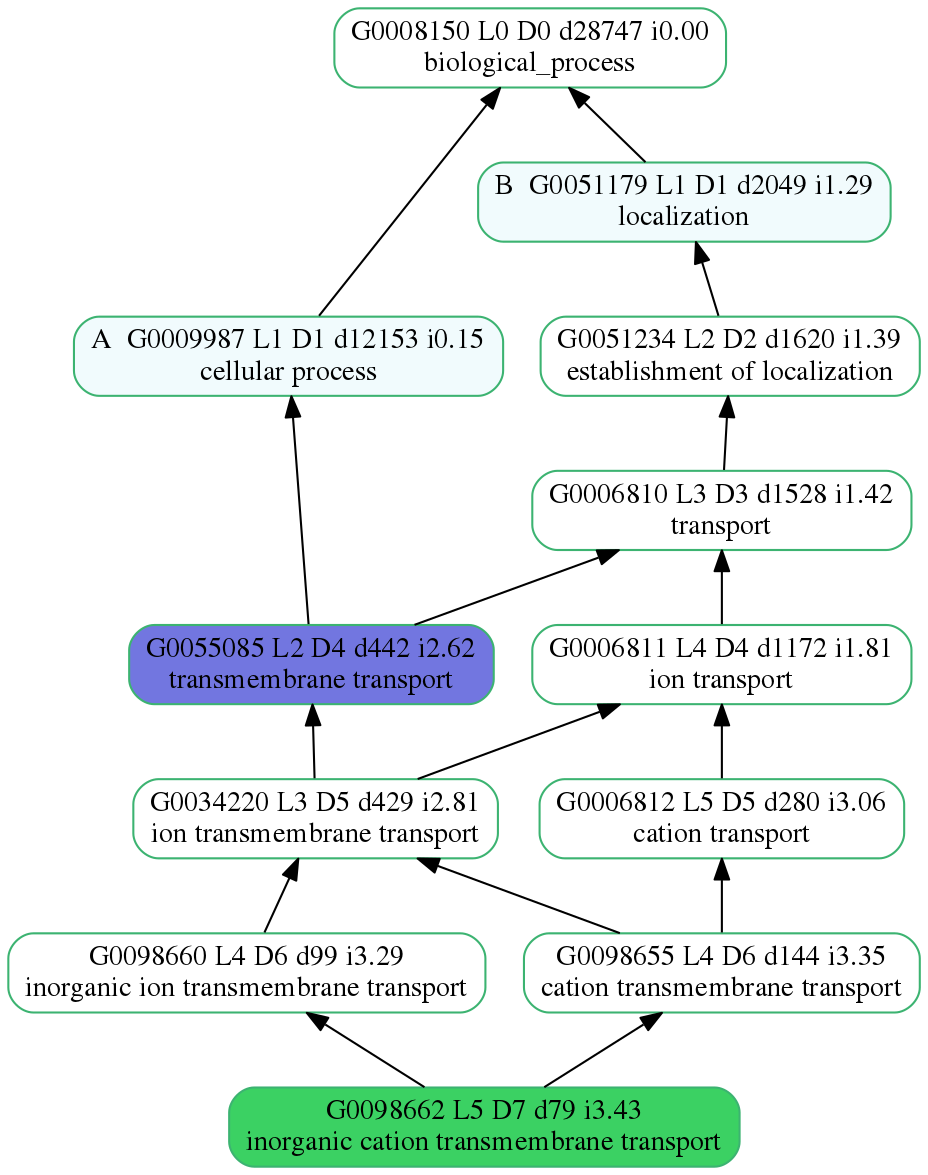

In [135]:
print(semantic_sim_matrix(['GO:0098662'], ['GO:0055085'], godag, termcounts))

img = draw_gos(['GO:0098662'], ['GO:0055085'])
img

In [136]:
pln_pubmed_gos = []
for k, v in  pln_pubmed.items():
    if len(v) > 0:
        pln_pubmed_gos.extend(v)

pln_pubmed_gos = set(pln_pubmed_gos)
len(pln_pubmed_gos)

147

In [137]:
pubmed_id_dict = {}

for k, v in go_dict.items():
    intr = pln_pubmed_gos & set(v)
    if len(intr) > 0:
        pubmed_id_dict[k] = {"pln": [], "gocat": []}
        pubmed_id_dict[k]["gocat"].extend(intr)
        for j, w in pln_pubmed.items():
            if len(set(w) & set(v)) > 0:
                pubmed_id_dict[k]["pln"].append(j)

# pubmed_id_lst = list(set(pubmed_id_lst))
len(pubmed_id_dict)

298

In [138]:
list(pubmed_id_dict.items())[:2]

[('34018684',
  {'pln': ['GO:0035335',
    'GO:0009620',
    'GO:0050832',
    'GO:0030522',
    'GO:0010557',
    'GO:0031328',
    'GO:0009891',
    'GO:0033143',
    'GO:0009755',
    'GO:0051254',
    'GO:0045893',
    'GO:1902680',
    'GO:1903508',
    'GO:0045935'],
   'gocat': ['GO:0045893',
    'GO:0045944',
    'GO:0050832',
    'GO:0033147',
    'GO:0006470',
    'GO:0030520']}),
 ('33966175',
  {'pln': ['GO:0043407',
    'GO:0030522',
    'GO:0010557',
    'GO:0031328',
    'GO:0009891',
    'GO:0009755',
    'GO:0051254',
    'GO:0045893',
    'GO:1902680',
    'GO:1903508',
    'GO:0045935'],
   'gocat': ['GO:0045893', 'GO:0045944', 'GO:0030520', 'GO:0001933']})]

In [139]:
goa_ss_pubmed = semantic_sim_matrix(goa_lst, pubmed_gos_bp, godag, termcounts)
goa_ss_pubmed_df = pd.DataFrame(goa_ss_pubmed, index=goa_lst, columns=pubmed_gos_bp)
display(goa_ss_pubmed_df)

,GO:0043936,GO:0035702,GO:0032967,GO:0044320,GO:2000210,GO:0033594,GO:0051384,GO:1903215,GO:0009955,GO:1904709,...,GO:0045893,GO:0009627,GO:0071310,GO:0000723,GO:0042127,GO:0060548,GO:0060744,GO:0031640,GO:2000107,GO:1905932
GO:0006658,NaN,0.000000,0.000000,0.021556,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.033497,0.156197,0.000000,0.000000,0.000000,0.024316,0.000000,0.000000
GO:0070986,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.210624,0.000000,0.000000,0.000000
GO:0002064,NaN,0.000000,0.000000,0.023832,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.039332,0.029126,0.000000,0.000000,0.191056,0.027251,0.000000,0.000000
GO:0030512,0.0,0.050258,0.070068,0.000000,0.070125,0.000000,0.000000,0.194565,0.0,NaN,...,0.117546,0.0,0.000000,0.068504,0.118135,0.317123,0.000000,0.000000,0.232315,0.061187
GO:0051965,0.0,0.049964,0.177045,0.000000,0.174993,0.000000,0.000000,0.067971,0.0,NaN,...,0.292066,0.0,0.000000,0.067958,0.116867,0.110352,0.000000,0.000000,0.081060,0.349158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0001558,0.0,0.056954,0.081686,0.000000,0.080477,0.000000,0.000000,0.078209,0.0,NaN,...,0.149857,0.0,0.000000,0.081576,0.150815,0.140138,0.000000,0.000000,0.096057,0.068922
GO:0010948,0.0,0.055970,0.079936,0.000000,0.078938,0.000000,0.000000,0.218341,0.0,NaN,...,0.144608,0.0,0.000000,0.079571,0.145500,0.385554,0.000000,0.000000,0.267035,0.067791
GO:0002683,0.0,0.056533,0.080935,0.000000,0.072132,0.000000,0.000000,0.205052,0.0,NaN,...,0.133377,0.0,0.000000,0.080715,0.134216,0.365116,0.000000,0.000000,0.251389,0.061848
GO:0001818,0.0,0.055167,0.182447,0.000000,0.070207,0.000000,0.000000,0.199729,0.0,NaN,...,0.397336,0.0,0.000000,0.077959,0.127702,0.348576,0.000000,0.000000,0.243436,0.060428


/home/xabush/venv/bin/go_plot.py  GO:0006658#3bd163 GO:0043936#7276e0 -o datasets/aaa_lin.png --gaf=datasets/goa_human.gaf
b'go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 GO Terms\n GoSubDag:   2 sources in  28 GOs rcnt(False). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name id\n GoSubDag: relationships: set()\nHMS:0:00:10.460699 479,438 annotations READ: datasets/goa_human.gaf \n GoSubDag:   2 sources in  28 GOs rcnt(True). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 tcnt tfreq tinfo id\n GoSubDag: relationships: set()\n        GO:0008150  # BP 28747  17,652 1.000000  0.00 L00 D00       biological_process\n#f1fbfd GO:0009987  # BP 12153  15,209 0.861602  0.15 L01 D01 A     cellular process\n#f1fbfd GO:0008152  # BP  6382   8,234 0.466463  0.76 L01 D01 B     metabolic process\n#f1fbfd GO:0032502  # BP  3211   5,005 0.283537  1.26 L01 D01 C     developmental process\n#f1fbfd GO:0000003  # BP    32      13 0.000736  7.21 L01

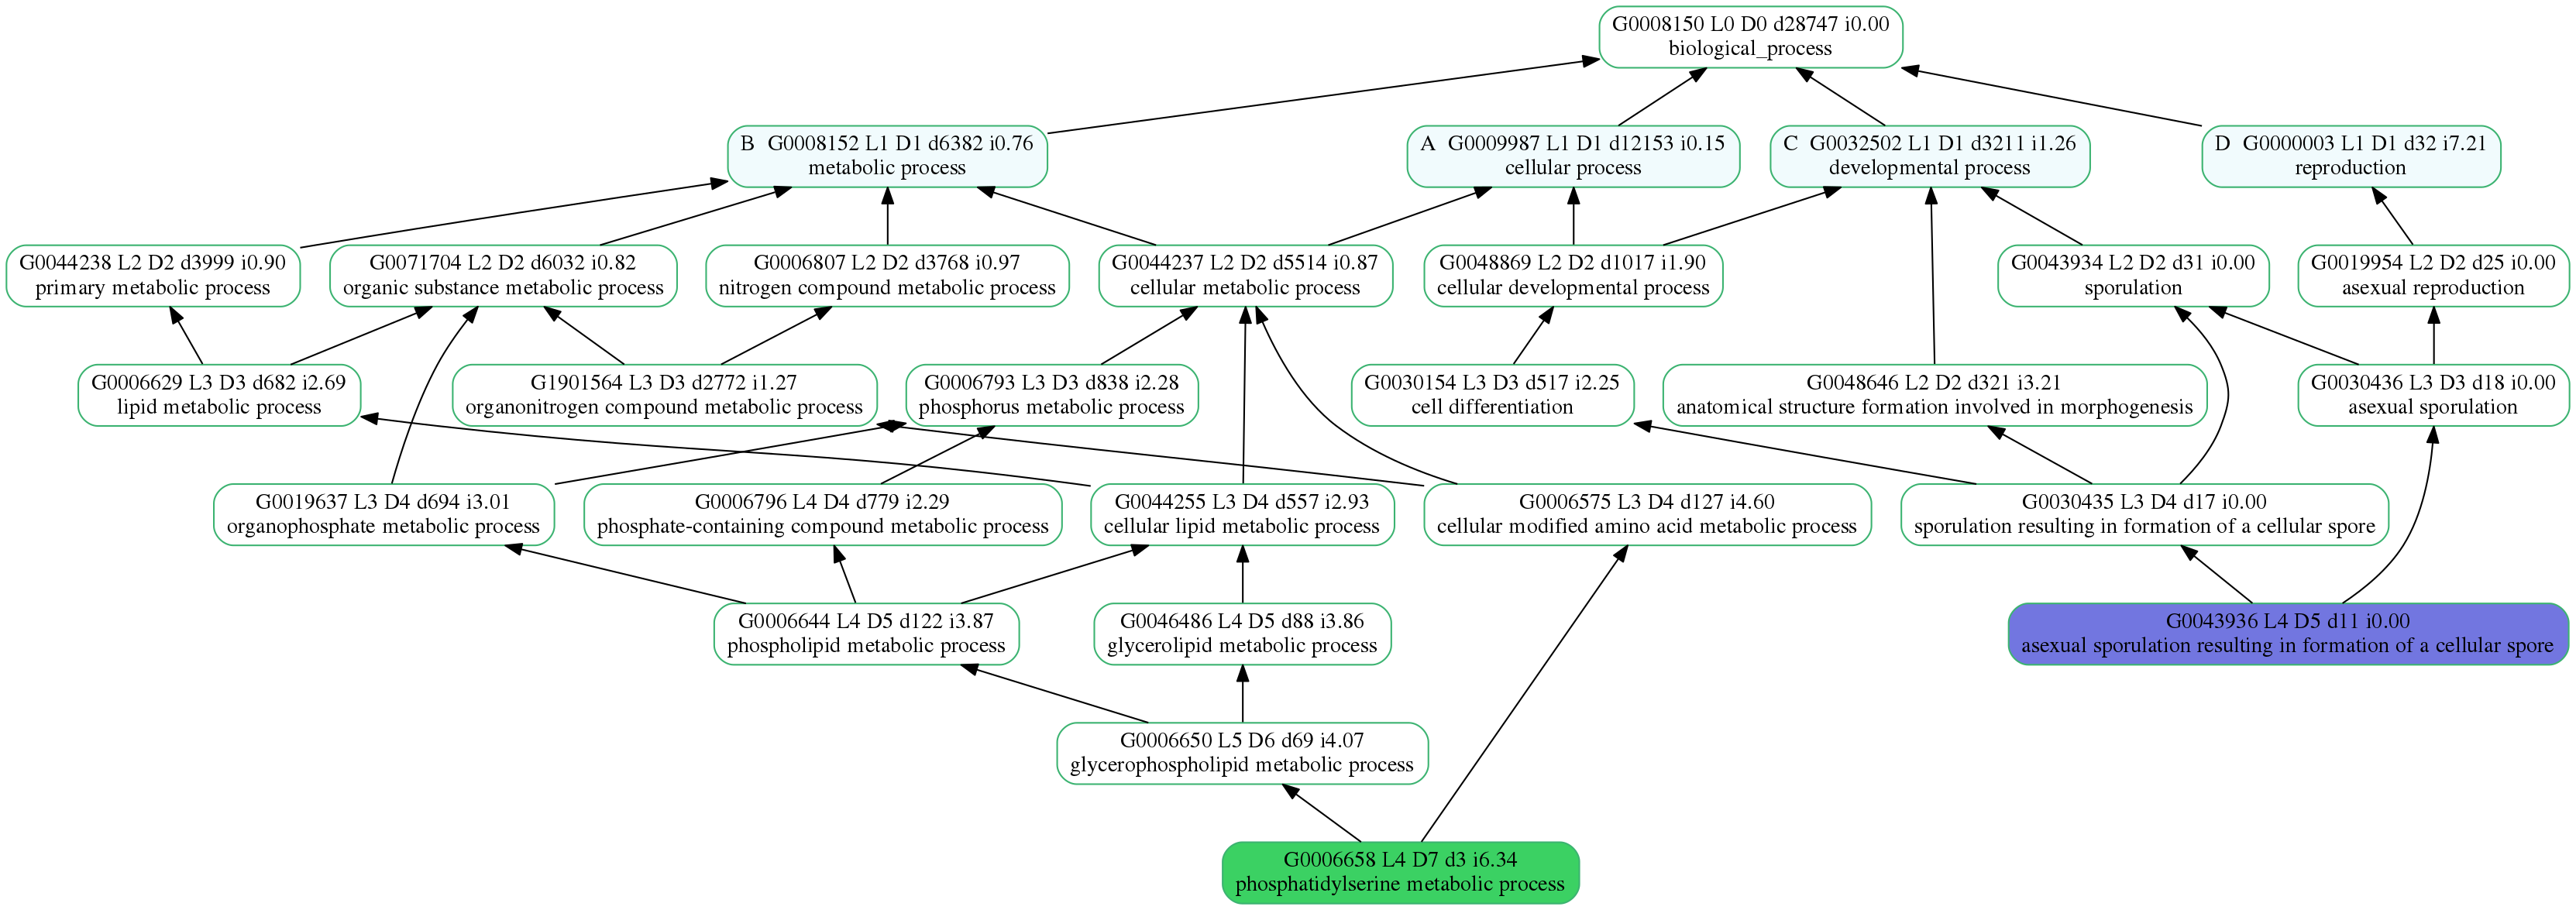

In [140]:
img = draw_gos(["GO:0006658"], ["GO:0043936"])
img

In [141]:

goa_pubmed = {}

for i, go_1 in enumerate(goa_ss_pubmed_df.index.to_list()):
    goa_pubmed[go_1] = []
    for j, go_2 in enumerate(goa_ss_pubmed_df.columns.to_list()):
        if not np.isnan(goa_ss_pubmed_df.iat[i, j]) and goa_ss_pubmed_df.iat[i, j] >= 0.8:
            goa_pubmed[go_1].append(go_2)

In [142]:
goa_pubmed_gos = []
for k, v in  goa_pubmed.items():
    if len(v) > 0:
        goa_pubmed_gos.extend(v)

goa_pubmed_gos = set(goa_pubmed_gos)
len(goa_pubmed_gos)

107

In [143]:
pubmed_id_dict_2 = {}

for k, v in go_dict.items():
    intr = goa_pubmed_gos & set(v)
    if len(intr) > 0:
        pubmed_id_dict_2[k] = {"goa": [], "gocat": []}
        pubmed_id_dict_2[k]["gocat"].extend(intr)
        for j, w in goa_pubmed.items():
            if len(set(w) & set(v)) > 0:
                pubmed_id_dict_2[k]["goa"].append(j)

# pubmed_id_lst = list(set(pubmed_id_lst))
len(pubmed_id_dict_2)

294

In [144]:
pln_diff = pln_pubmed_gos - goa_pubmed_gos
goa_diff = goa_pubmed_gos - pln_pubmed_gos
print(len(pln_diff))
print(len(goa_diff))

142
102


In [145]:
pln_diff_pubmed = [k.strip() for k in pubmed_id_dict if len(set(pubmed_id_dict[k]["gocat"]) & pln_diff)]
goa_diff_pubmed = [k.strip() for k in pubmed_id_dict_2 if len(set(pubmed_id_dict_2[k]["gocat"]) & goa_diff)]

In [146]:
len(set(pln_diff_pubmed) - set(goa_diff_pubmed))

7

In [147]:
len(set(goa_diff_pubmed) - set(pln_diff_pubmed))

2

In [148]:
pln_diff_pubmed_id = set(pln_diff_pubmed) - set(goa_diff_pubmed)
pln_diff_pubmed_id

{'32571823',
 '32871976',
 '33223820',
 '33363626',
 '33660534',
 '33835229',
 '34020697'}

In [149]:
goa_diff_pubmed_id = set(goa_diff_pubmed) - set(pln_diff_pubmed)
goa_diff_pubmed_id

{'32919119', '33543027'}

In [153]:
pubmed_id_pln_dict = {k: v for k, v in pubmed_id_dict.items() if k in pln_diff_pubmed_id}
list(pubmed_id_pln_dict.items())[:2]

[('33835229',
  {'pln': ['GO:0061045',
    'GO:0002376',
    'GO:0010243',
    'GO:0010033',
    'GO:0042221',
    'GO:0031100'],
   'gocat': ['GO:0006955', 'GO:0030194', 'GO:0031100', 'GO:0010033']}),
 ('33223820',
  {'pln': ['GO:0010557',
    'GO:0031328',
    'GO:0009891',
    'GO:0051254',
    'GO:0045893',
    'GO:1902680',
    'GO:1903508',
    'GO:0045935'],
   'gocat': ['GO:0045893']})]

[[0.82682952]]
/home/xabush/venv/bin/go_plot.py  GO:0061045#3bd163 GO:0030194#7276e0 -o datasets/aaa_lin.png --gaf=datasets/goa_human.gaf
b'go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 GO Terms\n GoSubDag:   2 sources in  27 GOs rcnt(False). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name id\n GoSubDag: relationships: set()\nHMS:0:00:10.410305 479,438 annotations READ: datasets/goa_human.gaf \n GoSubDag:   2 sources in  27 GOs rcnt(True). 0 alt GO IDs\n GoSubDag: namedtuple fields: NS level depth GO alt GO_name dcnt D1 tcnt tfreq tinfo id\n GoSubDag: relationships: set()\n        GO:0008150  # BP 28747  17,652 1.000000  0.00 L00 D00       biological_process\n#f1fbfd GO:0065007  # BP 12117  12,239 0.693349  0.37 L01 D01 A     biological regulation\n        GO:0050789  # BP 10892  11,574 0.655676  0.42 L02 D02 A     regulation of biological process\n        GO:0065008  # BP  1502   3,570 0.202243  1.60 L02 D02 A     regulation of biological quality\n        GO:

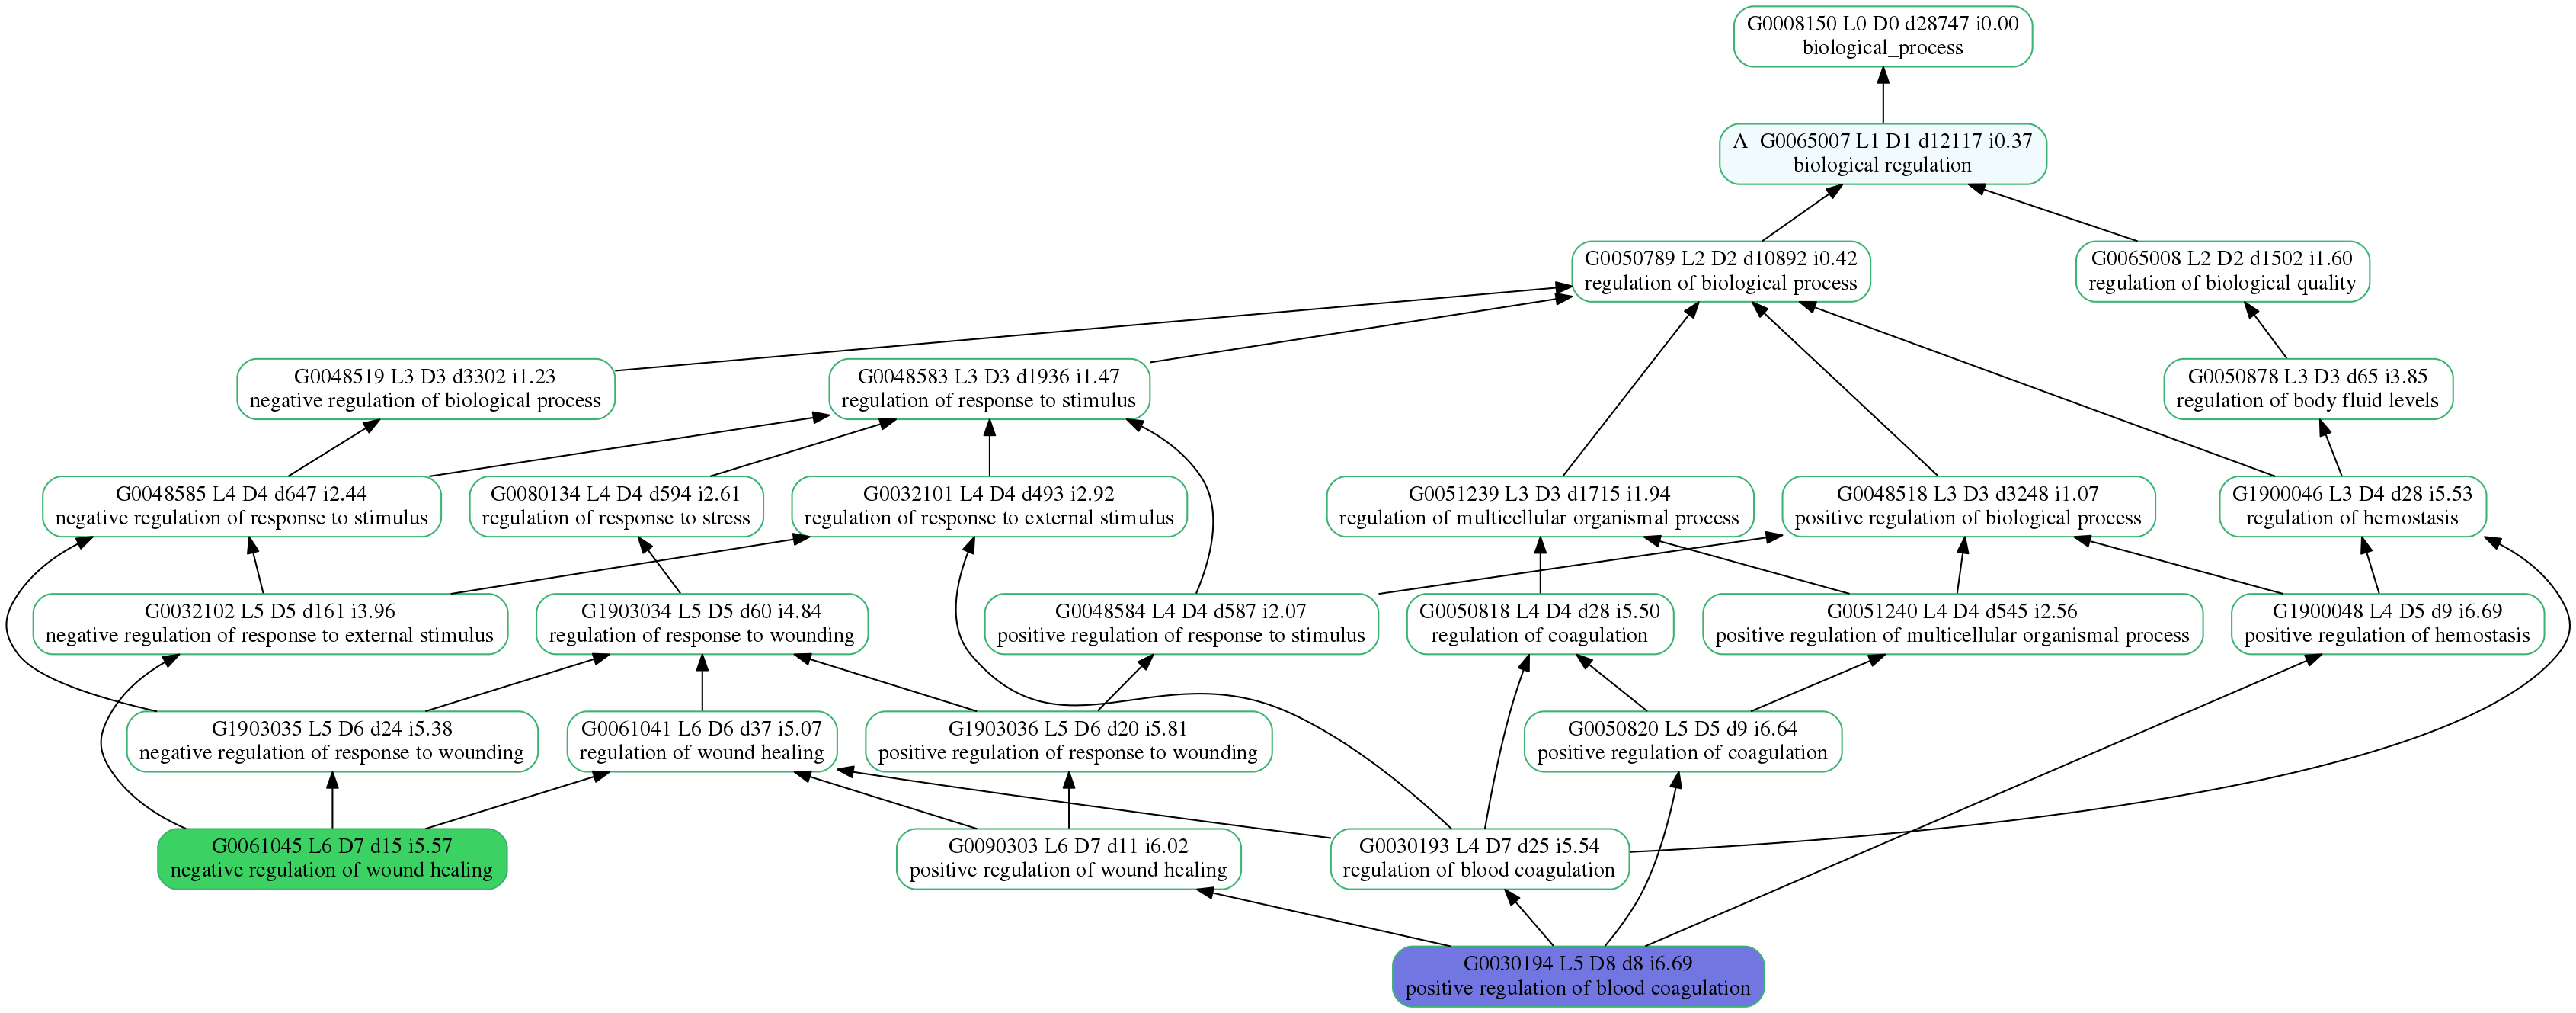

In [156]:
print(semantic_sim_matrix(["GO:0061045"], ["GO:0030194"], godag, termcounts))
img = draw_gos(["GO:0061045"], ["GO:0030194"])
img

In [157]:
pubmed_id_goa_dict = {k: v for k, v in pubmed_id_dict_2.items() if k in goa_diff_pubmed_id}
list(pubmed_id_goa_dict.items())[:2]


[('33543027',
  {'goa': ['GO:0010558',
    'GO:0031327',
    'GO:2000113',
    'GO:0009890',
    'GO:0001837',
    'GO:0010634',
    'GO:0060317',
    'GO:0051270',
    'GO:0048762',
    'GO:0051253',
    'GO:0031324',
    'GO:0001558',
    'GO:0001818'],
   'gocat': ['GO:0000122',
    'GO:0030308',
    'GO:0001837',
    'GO:0045892',
    'GO:0030335',
    'GO:0010629',
    'GO:0030336']}),
 ('32919119',
  {'goa': ['GO:0045665', 'GO:0001818'],
   'gocat': ['GO:0045666', 'GO:0010629']})]

In [211]:
go_abstract_pln_dict = {"pubmed_ids": [], "abstracts": [], "pln_go": [], "gocat_go": []}

for i in pubmed_id_dict:
    pln_gos = pubmed_id_dict[i]["pln"]
    gocat_gos = pubmed_id_dict[i]["gocat"]

    if len(pln_gos) > 0 or len(gocat_gos) > 0:
        if len(pln_gos) < len(gocat_gos):
            k = 0
            for j in gocat_gos:
                go_abstract_pln_dict["pubmed_ids"].append(i)
                if k == 0:
                    go_abstract_pln_dict["abstracts"].append(abstract_dict[i])
                else:
                    go_abstract_pln_dict["abstracts"].append("-")
                go_abstract_pln_dict["gocat_go"].append(j)
                if k < len(pln_gos):
                    go_abstract_pln_dict["pln_go"].append(pln_gos[k])
                else:
                    go_abstract_pln_dict["pln_go"].append("-")
                k += 1

        else:
            k = 0
            for j in pln_gos:
                go_abstract_pln_dict["pubmed_ids"].append(i)
                if k == 0:
                    go_abstract_pln_dict["abstracts"].append(abstract_dict[i])
                else:
                    go_abstract_pln_dict["abstracts"].append("-")
                go_abstract_pln_dict["pln_go"].append(j)
                if k < len(gocat_gos):
                    go_abstract_pln_dict["gocat_go"].append(gocat_gos[k])
                else:
                    go_abstract_pln_dict["gocat_go"].append("-")
                k += 1

In [212]:
go_abstract_pln_df = pd.DataFrame.from_dict(go_abstract_pln_dict)
go_abstract_pln_df

,pubmed_ids,abstracts,pln_go,gocat_go
0,34018684,The NanoString GeoMx Digital Spatial Profiling...,GO:0035335,GO:0045893
1,34018684,-,GO:0009620,GO:0045944
2,34018684,-,GO:0050832,GO:0050832
3,34018684,-,GO:0030522,GO:0033147
4,34018684,-,GO:0010557,GO:0006470
...,...,...,...,...
3551,32081423,-,GO:0051254,-
3552,32081423,-,GO:0045893,-
3553,32081423,-,GO:1902680,-
3554,32081423,-,GO:1903508,-


In [215]:
go_abstract_pln_df.to_csv("datasets/pln_goa_comp/pubmed_abstracts_pln_go.csv")

In [213]:
go_abstract_goa_dict = {"pubmed_ids": [], "abstracts": [], "goa_go": [], "gocat_go": []}

for i in pubmed_id_dict_2:
    goa_gos = pubmed_id_dict_2[i]["goa"]
    gocat_gos = pubmed_id_dict_2[i]["gocat"]

    if len(goa_gos) > 0 or len(gocat_gos) > 0:
        if len(goa_gos) < len(gocat_gos):
            k = 0
            for j in gocat_gos:
                go_abstract_goa_dict["pubmed_ids"].append(i)
                if k == 0:
                    go_abstract_goa_dict["abstracts"].append(abstract_dict[i])
                else:
                    go_abstract_goa_dict["abstracts"].append("-")
                go_abstract_goa_dict["gocat_go"].append(j)
                if k < len(goa_gos):
                    go_abstract_goa_dict["goa_go"].append(goa_gos[k])
                else:
                    go_abstract_goa_dict["goa_go"].append("-")
                k += 1

        else:
            k = 0
            for j in goa_gos:
                go_abstract_goa_dict["pubmed_ids"].append(i)
                if k == 0:
                    go_abstract_goa_dict["abstracts"].append(abstract_dict[i])
                else:
                    go_abstract_goa_dict["abstracts"].append("-")
                go_abstract_goa_dict["goa_go"].append(j)
                if k < len(gocat_gos):
                    go_abstract_goa_dict["gocat_go"].append(gocat_gos[k])
                else:
                    go_abstract_goa_dict["gocat_go"].append("-")
                k += 1

In [214]:
go_abstract_goa_df = pd.DataFrame.from_dict(go_abstract_goa_dict)
go_abstract_goa_df

,pubmed_ids,abstracts,goa_go,gocat_go
0,34018684,The NanoString GeoMx Digital Spatial Profiling...,GO:0017148,GO:0035278
1,34018684,-,GO:0010558,GO:0000122
2,34018684,-,GO:0031327,GO:0045892
3,34018684,-,GO:2000113,-
4,34018684,-,GO:0009890,-
...,...,...,...,...
2541,32081423,-,GO:0031327,GO:0045892
2542,32081423,-,GO:2000113,-
2543,32081423,-,GO:0009890,-
2544,32081423,-,GO:0051253,-


In [216]:
go_abstract_goa_df.to_csv("datasets/pln_goa_comp/pubmed_abstracts_goa_go.csv")